# Simulations numériques

In [1]:
# import useful python packages
import numpy as np # for vector and matrix manipulations
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plotting nicer

sb.set_theme(context="notebook", style="ticks")

In [2]:
def rk4_solver(fun, t_end, y0, h=0.1):
    """
    Custom Runge-Kutta 4th order solver for ODEs (similar to `solve_ivp` interface).
    
    Parameters
    ----------
    fun : callable
        The system of differential equations to solve. It must have the signature `fun(t, y)`,
        where `t` is a scalar and `y` is an array-like object representing the state vector.
    t_span : 2-tuple of floats
        The time interval over which to integrate. Must be of the form (t0, tf).
    y0 : array-like
        Initial state vector.
    h : float, optional
        Fixed step size (default is 0.1).

    Returns
    -------
    OdeResult : dict
        A dictionary with two keys:
        - `t`: Array of time points where the solution was evaluated.
        - `y`: 2D array where each row is the solution vector at a corresponding time.
        
    Notes
    -----
    This is a fixed-step RK4 implementation, so the accuracy depends on the step size `h`. 
    For adaptive step size control, use solvers like `RK45` in SciPy.
    """
    # Initialize time and solution arrays
    t_values = np.arange(0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    
    y_values[0] = y0
    
    y = y0
    t = 0
    
    for i in range(1, len(t_values)):
        
        # RK4 steps
        k1 = h * fun(t, y)
        k2 = h * fun(t + 0.5 * h, y + 0.5 * k1)
        k3 = h * fun(t + 0.5 * h, y + 0.5 * k2)
        k4 = h * fun(t + h, y + k3)
        
        # Update state vector
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
        
        # Update time
        t = t_values[i]
        y_values[i] = y
    
    return {'t': t_values, 'y': y_values.T}  # Transpose `y_values` to match SciPy format


In [3]:
def lotka_volterra(t, y):
    """
    Lotka-Volterra predator-prey model.

    Parameters
    ----------
    t : float
        Time variable.
    y : array-like
        State vector where y[0] is the prey population and y[1] is the predator population.
        
    Returns
    -------
    dydt : ndarray
        Array of the derivatives [dprey/dt, dpredator/dt].
    """
    alpha = 1.0  # Prey birth rate
    beta = 0.1   # Predation rate
    delta = 0.075  # Predator reproduction rate
    gamma = 1.5  # Predator death rate
    
    prey = y[0]
    predator = y[1]
    
    dprey_dt = alpha * prey - beta * prey * predator
    dpredator_dt = delta * prey * predator - gamma * predator
    
    return np.array([dprey_dt, dpredator_dt])

## Simulate

In [4]:
# system parameters
y0 = np.array([40, 9])  # Initial prey and predator populations

# integration parameters

t_end = 50 # End time
h = 0.1  # Step size

In [5]:
# Numerically integrate the system using the custom RK4 solver
solution = rk4_solver(lotka_volterra, t_end, y0, h=h)

# Extract the results
t_values = solution['t']
prey_population = solution['y'][0, :]  # First row: prey
predator_population = solution['y'][1, :]  # Second row: predator


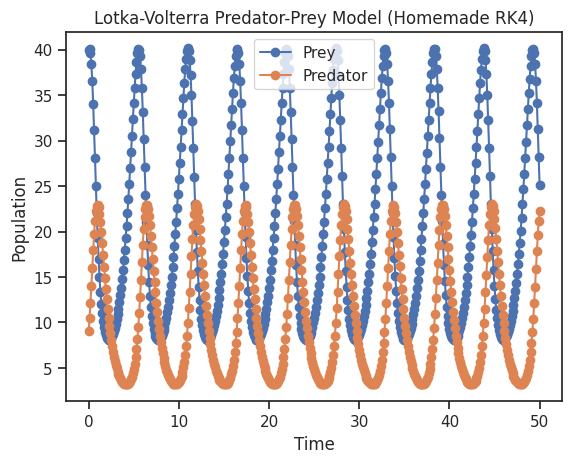

In [6]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the results
ax.plot(t_values, prey_population, "o-", label="Prey")
ax.plot(t_values, predator_population, "o-", label="Predator")

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('Lotka-Volterra Predator-Prey Model (Homemade RK4)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


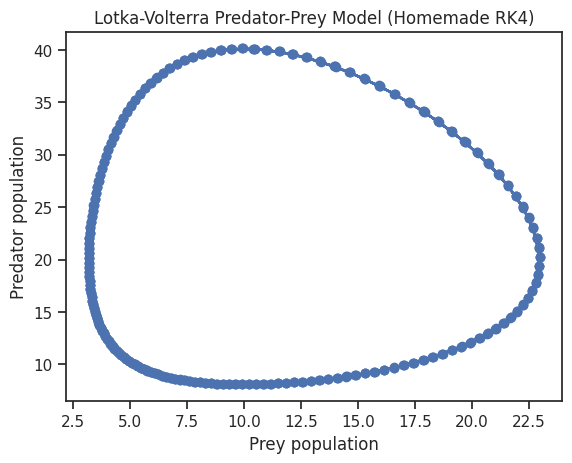

In [7]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the results
ax.plot(predator_population, prey_population, "o-")

# Set labels and title
ax.set_xlabel('Prey population')
ax.set_ylabel('Predator population')
ax.set_title('Lotka-Volterra Predator-Prey Model (Homemade RK4)')

# Show the plot
plt.show()


## Use SciPy's function

Find mode information about Scipy's solve_ivp in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). 

In [8]:
from scipy.integrate import solve_ivp

In [9]:
t_span = (0, t_end)
t_eval = np.arange(0, t_end + h, h)

solution = solve_ivp(lotka_volterra, t_span, y0, method='RK45', t_eval=t_eval)

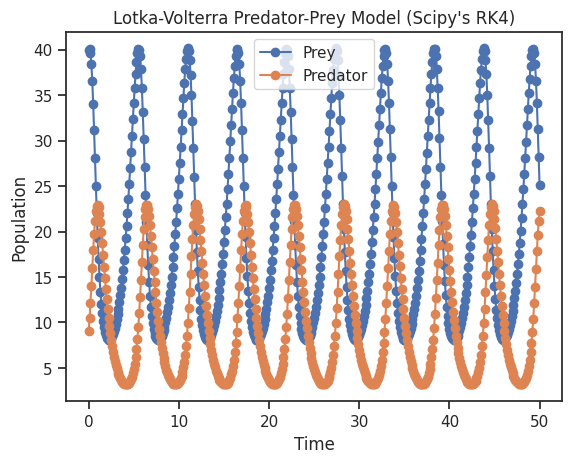

In [10]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the results
ax.plot(t_values, prey_population, "o-", label="Prey")
ax.plot(t_values, predator_population, "o-", label="Predator")

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title("Lotka-Volterra Predator-Prey Model (Scipy's RK4)")

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [11]:
def lorenz(t, y, sigma=10.0, beta=8.0/3.0, rho=28.0):
    """
    Lorenz system of differential equations.

    Parameters
    ----------
    t : float
        Time variable.
    y : array-like
        State vector [x, y, z].
    sigma : float, optional
        Prandtl number, default is 10.0.
    beta : float, optional
        Geometric factor, default is 8/3.
    rho : float, optional
        Rayleigh number, default is 28.0.

    Returns
    -------
    dydt : ndarray
        Derivatives [dx/dt, dy/dt, dz/dt].
    """
    x, y, z = y
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

In [12]:
# system parameters
y0 = np.array([2, -1, 0.5])  # Initial prey and predator populations

# integration parameters

t_end = 50 # End time
h = 0.001  # Step size

In [13]:
# Numerically integrate the system using the custom RK4 solver
solution = rk4_solver(lorenz, t_end, y0, h=h)

# Extract the results
t_values = solution['t']
x = solution['y'][0, :]  # First row: prey
y = solution['y'][1, :]  # Second row: predator
z = solution['y'][2, :]  # Second row: predator


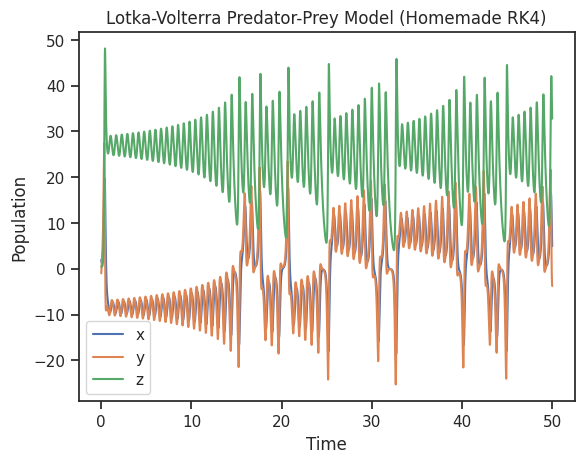

In [14]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the results
ax.plot(t_values, x, "-", label="x")
ax.plot(t_values, y, "-", label="y")
ax.plot(t_values, z, "-", label="z")

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('Lotka-Volterra Predator-Prey Model (Homemade RK4)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


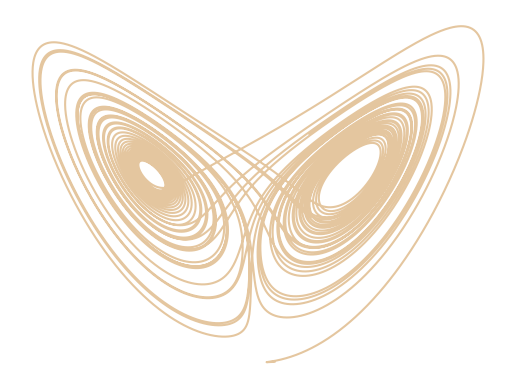

In [15]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the results
ax.plot(x, z, "-", c="burlywood", alpha=0.8)

sb.despine(left=True, bottom=True)
ax.set_xticks([])

ax.set_yticks([])
# Show the plot

plt.savefig("lorenz_attractor.png", dpi=250)
plt.show()
